In [1]:
pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0rc3)


In [2]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [0]:
import pandas as pd
import numpy as np
fb_complete_data = pd.read_csv("/content/fb_train.csv")

In [5]:
fb_complete_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000


In [0]:
fb_training_processed = fb_complete_data[['Open']].values

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

fb_training_scaled = scaler.fit_transform(fb_training_processed)

In [8]:
len(fb_training_scaled)

1257

In [0]:
fb_training_features= []
fb_training_labels = []
for i in range(60, len(fb_training_scaled)):
    fb_training_features.append(fb_training_scaled[i-60:i, 0])
    fb_training_labels.append(fb_training_scaled[i, 0])

In [0]:
X_train = np.array(fb_training_features)
y_train = np.array(fb_training_labels)

In [11]:
print(X_train.shape)
print(y_train.shape)

(1197, 60)
(1197,)


In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Activation, Dense, Flatten, Dropout,  Flatten, LSTM
from tensorflow.keras.models import Model

In [14]:
input_layer = Input(shape = (X_train.shape[1], 1))
lstm1 = LSTM(100, activation='relu', return_sequences=True)(input_layer)
do1 = Dropout(0.2)(lstm1)
lstm2 = LSTM(100, activation='relu', return_sequences=True)(do1)
do2 = Dropout(0.2)(lstm2)
lstm3 = LSTM(100, activation='relu', return_sequences=True)(do2)
do3 = Dropout(0.2)(lstm3)
lstm4 = LSTM(100, activation='relu')(do3)
do4 = Dropout(0.2)(lstm4)

output_layer = Dense(1)(do4)
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')

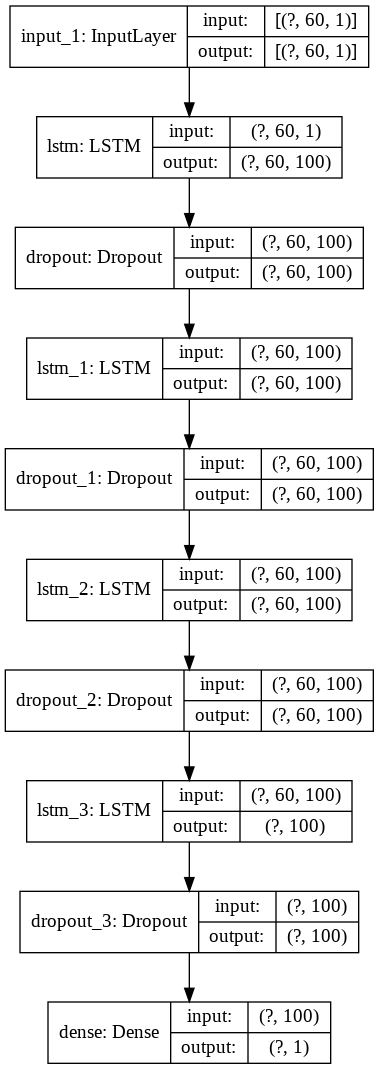

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='/content/model_plot1.png', show_shapes=True, show_layer_names=True)

In [16]:
print(X_train.shape)
print(y_train.shape)
y_train= y_train.reshape(-1,1)
print(y_train.shape)

(1197, 60, 1)
(1197,)
(1197, 1)


In [17]:
model_history = model.fit(X_train, y_train, epochs=100, verbose=1, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 11s 292ms/step - loss: 0.0835
Epoch 2/100
38/38 [==============================] - 11s 295ms/step - loss: 0.0081
Epoch 3/100
38/38 [==============================] - 11s 291ms/step - loss: 0.0064
Epoch 4/100
38/38 [==============================] - 11s 295ms/step - loss: 0.0071
Epoch 5/100
38/38 [==============================] - 11s 296ms/step - loss: 0.0058
Epoch 6/100
38/38 [==============================] - 11s 296ms/step - loss: 0.0068
Epoch 7/100
38/38 [==============================] - 11s 296ms/step - loss: 0.0054
Epoch 8/100
38/38 [==============================] - 11s 296ms/step - loss: 0.0053
Epoch 9/100
38/38 [==============================] - 11s 297ms/step - loss: 0.0056
Epoch 10/100
38/38 [==============================] - 11s 297ms/step - loss: 0.0052
Epoch 11/100
38/38 [==============================] - 11s 297ms/step - loss: 0.0056
Epoch 12/100
38/38 [==============================] - 11s 294ms/step - loss: 0.0049
E

In [0]:
fb_testing_complete_data = pd.read_csv("/content/fb_test.csv")
fb_testing_processed = fb_testing_complete_data[['Open']].values




In [0]:
fb_all_data = pd.concat((fb_complete_data['Open'], fb_testing_complete_data['Open']), axis=0)

In [20]:
test_inputs = fb_all_data [len(fb_all_data ) - len(fb_testing_complete_data) - 60:].values
print(test_inputs.shape)

(80,)


In [21]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
print(test_inputs.shape)

(80, 1)


In [0]:
fb_test_features = []
for i in range(60, 80):
    fb_test_features.append(test_inputs[i-60:i, 0])

In [23]:
X_test = np.array(fb_test_features)
print(X_test.shape)

(20, 60)


In [24]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(20, 60, 1)


In [25]:
y_pred =  model.predict(X_test)
print(y_pred.shape)

(20, 1)


In [0]:
y_pred = scaler.inverse_transform(y_pred)

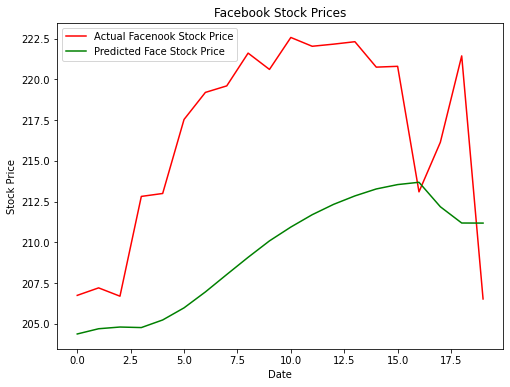

In [27]:
plt.figure(figsize=(8,6))
plt.plot(fb_testing_processed, color='red', label='Actual Facenook Stock Price')
plt.plot(y_pred , color='green', label='Predicted Face Stock Price')
plt.title('Facebook Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()